In [ ]:
# Import necessary libraries
import pandas as pd # For data manipulation and analysis
import matplotlib.pyplot as plt # For creating visualizations
import numpy as np # For numerical operations
%matplotlib inline
# To display plots directly in the notebook

In [ ]:
# Read the dataset from a CSV file into a pandas DataFrame
df=pd.read_csv('height-weight.csv')

In [ ]:
# Display the first 5 rows of the DataFrame to get a preview of the data
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


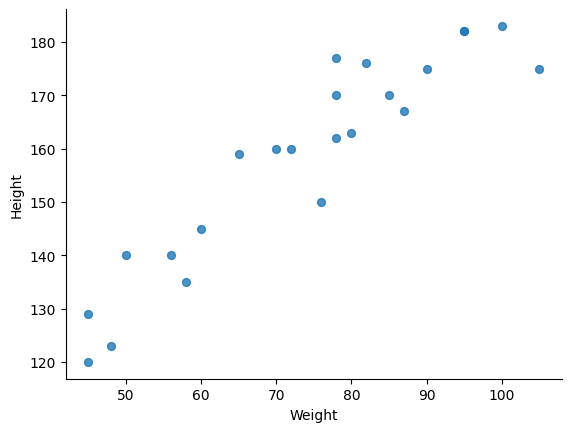

In [ ]:
# Create a scatter plot to visualize the relationship between Weight and Height
# 'kind'='scatter' specifies a scatter plot
# 'x' and 'y' specify the columns for the x and y axes
# 's' sets the size of the markers
# 'alpha' sets the transparency of the markers
df.plot(kind='scatter', x='Weight', y='Height', s=32, alpha=.8)
# Remove the top and right spines from the plot for cleaner aesthetics
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Divide the dataset into independent and dependent features
# X is the independent feature (input), which is the 'Weight' column
X=df[['Weight']]
# y is the dependent feature (output), which is the 'Height' column
y=df['Height']

In [ ]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
# X_train and y_train are used to train the model
# X_test and y_test are used to evaluate the model
# test_size=0.20 allocates 20% of the data to the test set
# random_state=42 ensures reproducibility of the split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
# Display the training set of the dependent variable (Height)
y_train

,Height
12,175
1,135
13,183
5,162
2,123
11,182
20,129
3,145
4,160
18,150


In [ ]:
# Display the testing set of the dependent variable (Height)
y_test

,Height
15,177
9,170
0,120
8,182
17,159


In [ ]:
## Standardize the dataset
# Import the StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler
scaler=StandardScaler()
# Fit the scaler on the training data and transform it
# This calculates the mean and standard deviation from the training data and scales it
X_train=scaler.fit_transform(X_train)
# Transform the test data using the scaler fitted on the training data
# It's important to use the same scaler fitted on the training data to transform the test data
X_test=scaler.transform(X_test)

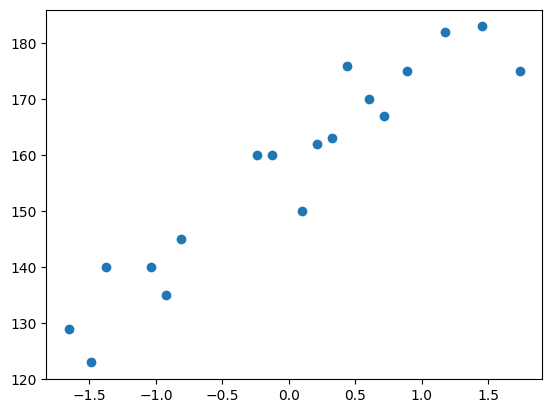

In [ ]:
# Create a scatter plot of the standardized training data
# X_train (standardized Weight) vs y_train (Height)
plt.scatter(X_train,y_train)

In [ ]:
# Import the LinearRegression model from scikit-learn
from sklearn.linear_model import LinearRegression

In [ ]:
# Create an instance of the LinearRegression model
regressor=LinearRegression()

In [ ]:
# Display the regressor object to see its parameters
regressor

LinearRegression()

In [ ]:
# Check the data type of X_train
type(X_train)

numpy.ndarray

In [ ]:
# Reshape X_train and X_test arrays
# This is often required by scikit-learn models when the input is a single feature
X_train=np.array(X_train).reshape(-1,1)
X_test=np.array(X_test).reshape(-1,1)

In [ ]:
# Check the shape of the y_train array
y_train.shape

(18,)

In [ ]:
# Train the Linear Regression model using the training data
# The model learns the relationship between X_train and y_train
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
## Get the coefficient and intercept of the trained model
# The coefficient (slope) represents the change in y for a one-unit change in X
print("Coefficient ,or we can call this as slope: ",regressor.coef_)
# The intercept is the value of y when X is 0
print("Intercept : ",regressor.intercept_)

Coefficient ,or we can call this as slope:  [17.03440872]
Intercept :  157.5


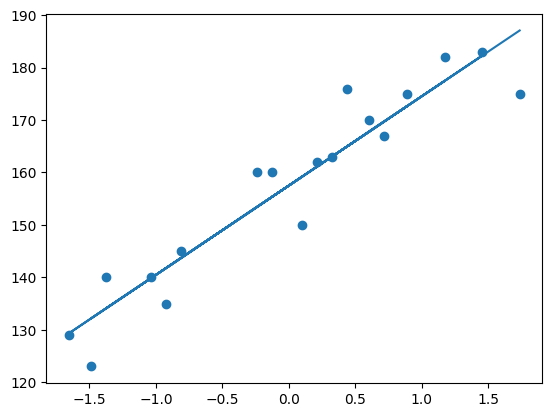

In [ ]:
# Create a scatter plot of the training data
plt.scatter(X_train,y_train)
# Plot the regression line on the training data
# regressor.predict(X_train) calculates the predicted y values for the training X values
plt.plot(X_train,regressor.predict(X_train))

In [ ]:
# Make predictions on the test data using the trained model
y_pred_test=regressor.predict(X_test)

In [ ]:
# Display the actual y values for the test set
y_test

,Height
15,177
9,170
0,120
8,182
17,159


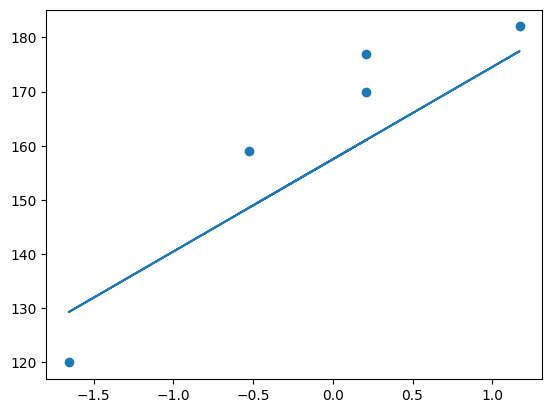

In [ ]:
# Create a scatter plot of the test data
plt.scatter(X_test,y_test)
# Plot the regression line on the test data
# regressor.predict(X_test) calculates the predicted y values for the test X values
plt.plot(X_test,regressor.predict(X_test))

In [ ]:
### Performance metrics
# Import metrics for evaluating regression model performance
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
# Calculate Mean Squared Error (MSE)
mse=mean_squared_error(y_test,y_pred_test)
# Calculate Mean Absolute Error (MAE)
mae=mean_absolute_error(y_test,y_pred_test)
# Calculate Root Mean Squared Error (RMSE)
rmse=np.sqrt(mse)
# Print the calculated metrics
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared score, which represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
r2 = r2_score(y_test, y_pred_test)

# Print R-squared score as a percentage for easier interpretation
print(f"R-squared (R²) score: {r2 * 100:.2f}%")

R-squared (R²) score: 77.70%


In [ ]:
# Take a random weight input from the user
random_weight = float(input("Enter a random weight: "))

# Reshape the input for standardization
random_weight_reshaped = np.array(random_weight).reshape(-1, 1)

# Standardize the random weight using the scaler fitted on the training data
random_weight_scaled = scaler.transform(random_weight_reshaped)

# Predict the height for the standardized random weight using the trained model
predicted_height = regressor.predict(random_weight_scaled)

# Display the predicted height
print(f"For a weight of {random_weight} kg, the predicted height is: {predicted_height[0]:.2f} cm")

Enter a random weight: 90
For a weight of 90.0 kg, the predicted height is: 172.64 cm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


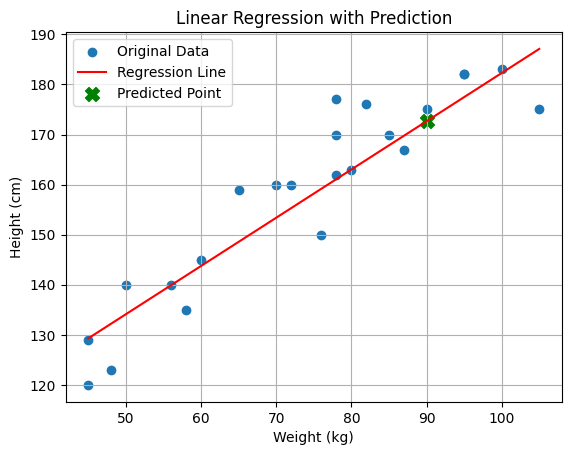

In [ ]:
# Create a scatter plot of the original data (using the original, non-scaled X for better interpretation on the graph)
plt.scatter(X, y, label='Original Data')

# Generate a range of weights to plot the extended regression line
# We'll use the min and max of the original X values for the range
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Convert the x_range back to a DataFrame with the original feature name
x_range_df = pd.DataFrame(x_range, columns=['Weight'])

# Standardize the x_range for prediction
x_range_scaled = scaler.transform(x_range_df)

# Predict the heights for the x_range
y_range_predicted = regressor.predict(x_range_scaled)

# Plot the extended regression line
plt.plot(x_range, y_range_predicted, color='red', label='Regression Line')

# Plot the random input point and its prediction
# We need to scale the random weight for prediction, but plot the original value on the x-axis
plt.scatter(random_weight, predicted_height[0], color='green', marker='X', s=100, label='Predicted Point')

# Add labels and title
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.title("Linear Regression with Prediction")
plt.legend()
plt.grid(True)


plt.show()

# Detailed comment on visually inspecting the graph for prediction accuracy
# By visually inspecting this graph, you can see how close the predicted point (green 'X') is to the original data points (blue circles)
# in the vicinity of the input weight on the x-axis.
# If the green 'X' is close to the blue circles around the same weight, it suggests the prediction aligns well with the observed data in that area.
# If the green 'X' is far from the neighboring blue circles, it might indicate that the model's prediction for that specific weight is less accurate
# compared to the actual data points.
# Remember that the regression line represents the overall trend, and individual data points might deviate from it.

